In [1]:
#necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cell_df=pd.read_csv('yosr.csv')
cell_df.shape
cell_df.size
cell_df.count()
cell_df['Etat'].value_counts()

1    47
0    36
Name: Etat, dtype: int64

In [10]:
cell_df

,Mean,Standard_Deviation,Skewness,Variance,Etat
0,25.6558,155.5168,3.0410,24185.0000,1
1,29.6218,159.4968,4.3051,25439.0000,1
2,-22.5978,102.9899,-2.2168,10607.0000,1
3,-5.6097,70.2875,-3.9618,4940.3000,1
4,-38.9337,147.5581,-3.0959,21773.0000,1
...,...,...,...,...,...
78,-25.5361,72.6522,-1.6074,5278.3000,0
79,-1.2661,48.0931,0.9056,2312.9000,0
80,-3.4632,21.7493,-4.9043,473.0328,0
81,-3.7150,33.1848,-3.6822,1101.2000,0


<AxesSubplot:xlabel='Mean', ylabel='Standard_Deviation'>

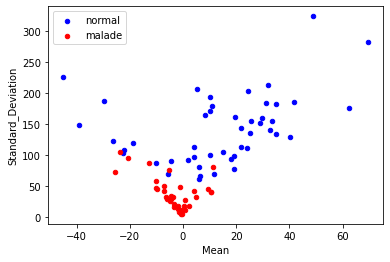

In [4]:
normal_df=cell_df[cell_df['Etat']==1][0:]
malade_df=cell_df[cell_df['Etat']==0][0:]

axes=normal_df.plot(kind='scatter',x='Mean',y='Standard_Deviation',color='blue',label='normal')
malade_df.plot(kind='scatter',x='Mean',y='Standard_Deviation',color='red',label='malade',ax=axes)

In [5]:
cell_df.columns

feature_df = cell_df[['Mean','Standard_Deviation','Skewness','Variance']]

#Independent var
x = np.asarray(feature_df)

#Dependent var
y = np.asarray(cell_df['Etat'])

x[0:5]

array([[ 2.565580e+01,  1.555168e+02,  3.041000e+00,  2.418500e+04],
       [ 2.962180e+01,  1.594968e+02,  4.305100e+00,  2.543900e+04],
       [-2.259780e+01,  1.029899e+02, -2.216800e+00,  1.060700e+04],
       [-5.609700e+00,  7.028750e+01, -3.961800e+00,  4.940300e+03],
       [-3.893370e+01,  1.475581e+02, -3.095900e+00,  2.177300e+04]])

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)

x_train.shape
y_train.shape


(74,)

In [7]:
x_test.shape
y_test.shape

(9,)

In [8]:
from sklearn import svm

classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train , y_train)

y_predict = classifier.predict(x_test)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9

